## loda an image

In [ ]:
#using pillow to make use of image
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline 
# to see some transformations made on image otherwise not seen

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

#print(np.asarray(img))
img

## create an image

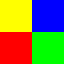

In [10]:
# createn random pixels and make an image

from PIL import Image
import numpy as np

w, h = 64,64

data = np.zeros((h,w,3), dtype=np.uint8)

#yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
#red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
#blue
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0] 
        
#green
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]  
        
img = Image.fromarray(data, 'RGB')
img
        

## transformation of images at pixel lvl

 Rows: 744, Cols: 1157


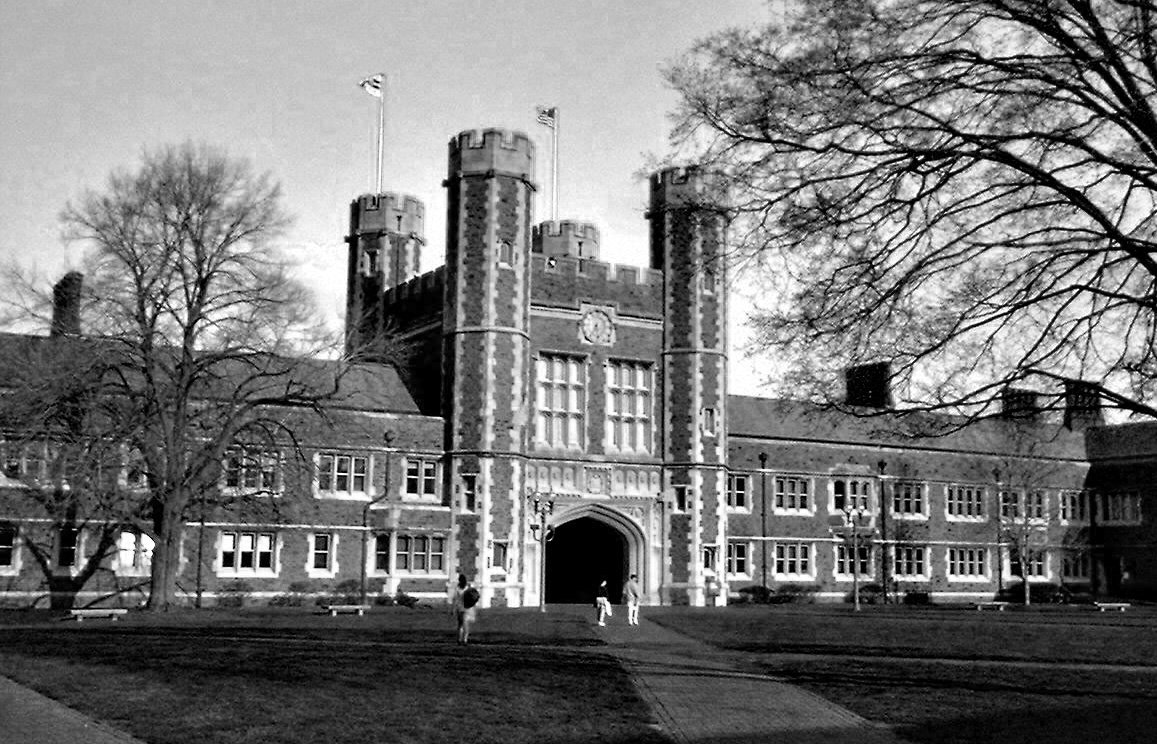

In [39]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests 
from io import BytesIO

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print(f' Rows: {rows}, Cols: {cols}')

#create new image
img2_array = np.zeros((rows,cols,3),dtype = np.uint8)
for row in range(rows):
    for col in range(cols):
        #t=np.mean(img_array[row,col])
        t=img_array[row,col,2]
        img2_array[row,col]=[t,t,t]
    
img2 = Image.fromarray(img2_array,'RGB')
img2

## standarize images

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


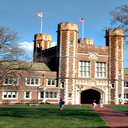

https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG


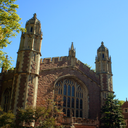

https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg


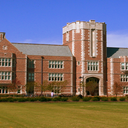

https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg


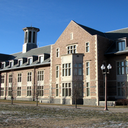

https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg


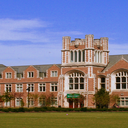

https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg


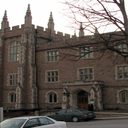

https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg


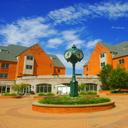

(7, 49152)


In [27]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

images = [
    "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/ff/"\
        "WashU_Graham_Chapel.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg"    
]

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((pad,0,rows,rows))
        
    return img

x=[]

for url in images:
    #ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array - (img_array-128)/128
    x.append(img_array)
    
#to numpy
x=np.array(x)

print(x.shape)

## adding some noise to an image

In [34]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) #spot is size of 1/20 of smallest dim
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:y+s,x:x+s] = 0
        
    return a2



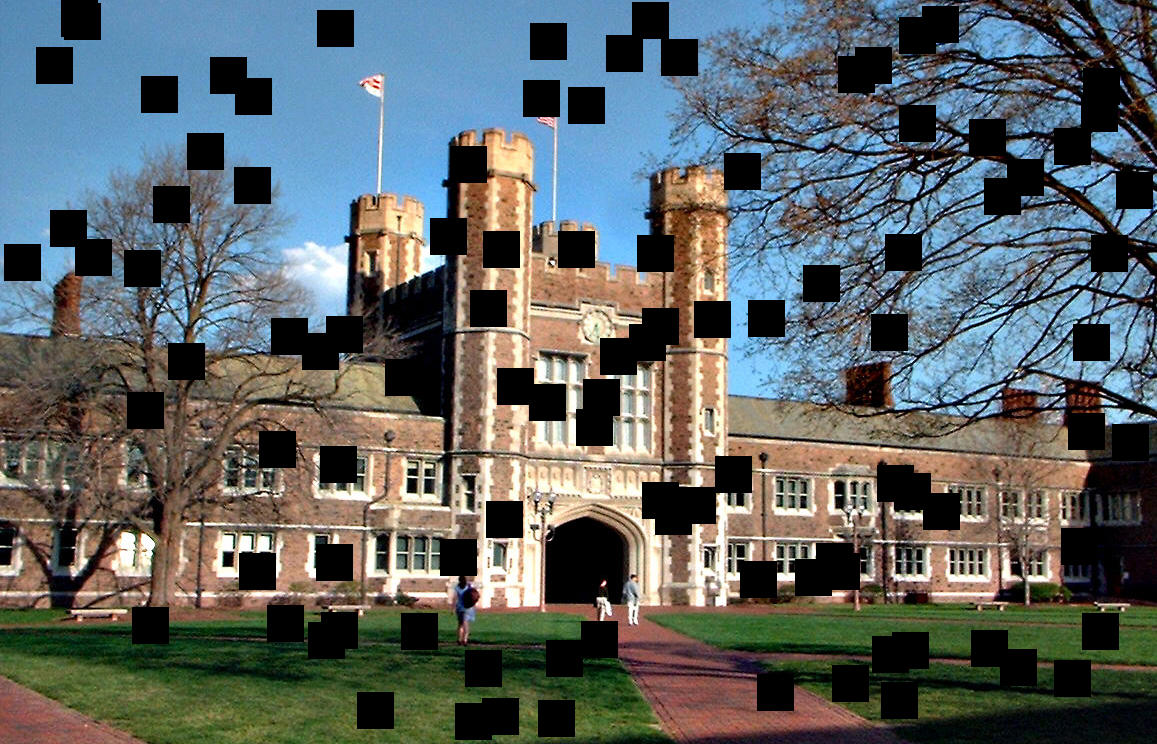

In [40]:
img2_array=add_noise(img_array)
img2 = Image.fromarray(img2_array, 'RGB')
display(img2)

In [38]:
img_array

array([ 20.,  56., 183., ..., 214., 156.,  86.], dtype=float32)